# A non-comprehensive list of useful commands

## Gathering information
### `hostname`
returns the hostname of the computer you work on.

### `whoami`
returns the username of the logged in user.

### `id`
returns the user id (uid), group id (gid) and groups that the user is a member of.

### `which <command>`
returns the absolute path to a command. Try it:
```console
$> which bash
```

### `whereis <command>`
returns all locations of a command, its configuration files and man pages.
```console
$> whereis bash
```

### `find -name <pattern>`
returns all paths that match a given filename pattern starting the search in the current working directory.

#### Example
```console
$> cd ~
$> find -name "*.sh"
```



## `grep`
Entire volumes have been dedicated to `grep` utility, here we only give a few basic examples to wet your appetite. `grep` stands for *global regular expression print*. It allows to extract lines that match a certain pattern (a regular expression) from a file, multiple files, or standard input.

### Example:
Extract all lines from `data1.csv` that start with the character "1".
```console
$> grep "^1" data1.csv 
1,micropop037,grotec,Wed 13 Oct 2021 03:34:33 PM CEST
10,micropop037,grotec,Wed 13 Oct 2021 03:34:51 PM CEST
11,micropop037,grotec,Wed 13 Oct 2021 03:34:53 PM CEST
12,micropop037,grotec,Wed 13 Oct 2021 03:34:55 PM CEST
13,micropop037,grotec,Wed 13 Oct 2021 03:34:57 PM CEST
14,micropop037,grotec,Wed 13 Oct 2021 03:34:59 PM CEST
15,micropop037,grotec,Wed 13 Oct 2021 03:35:01 PM CEST
16,micropop037,grotec,Wed 13 Oct 2021 03:35:03 PM CEST
17,micropop037,grotec,Wed 13 Oct 2021 03:35:05 PM CEST
18,micropop037,grotec,Wed 13 Oct 2021 03:35:07 PM CEST
19,micropop037,grotec,Wed 13 Oct 2021 03:35:09 PM CEST
```

Extract all lines from `data1.csv` that contain the string "3:35":
```console
$> grep "3:35" data1.csv 
15,micropop037,grotec,Wed 13 Oct 2021 03:35:01 PM CEST
16,micropop037,grotec,Wed 13 Oct 2021 03:35:03 PM CEST
17,micropop037,grotec,Wed 13 Oct 2021 03:35:05 PM CEST
18,micropop037,grotec,Wed 13 Oct 2021 03:35:07 PM CEST
19,micropop037,grotec,Wed 13 Oct 2021 03:35:09 PM CEST
20,micropop037,grotec,Wed 13 Oct 2021 03:35:11 PM CEST
21,micropop037,grotec,Wed 13 Oct 2021 03:35:13 PM CEST
22,micropop037,grotec,Wed 13 Oct 2021 03:35:15 PM CEST
23,micropop037,grotec,Wed 13 Oct 2021 03:35:17 PM CEST
24,micropop037,grotec,Wed 13 Oct 2021 03:35:19 PM CEST
25,micropop037,grotec,Wed 13 Oct 2021 03:35:21 PM CEST
26,micropop037,grotec,Wed 13 Oct 2021 03:35:23 PM CEST
27,micropop037,grotec,Wed 13 Oct 2021 03:35:25 PM CEST
28,micropop037,grotec,Wed 13 Oct 2021 03:35:27 PM CEST
29,micropop037,grotec,Wed 13 Oct 2021 03:35:29 PM CEST
30,micropop037,grotec,Wed 13 Oct 2021 03:35:31 PM CEST
```

## `wget`
With `wget`, you can download files from the internet:

```console
$> wget https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/009/858/895/GCF_009858895.2_ASM985889v3/GCF_009858895.2_ASM985889v3_genomic.gff.gz
```

## `curl`
`curl` is a utility to interact with web servers. You can use it to download files from a web address like
```console
$> curl https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/009/858/895/GCF_009858895.2_ASM985889v3/GCF_009858895.2_ASM985889v3_genomic.gff.gz
```

Beyond downloading, `curl` also supports pushing data to a server, filling out web forms and much more. We will not go into details here. Remember `curl` as an alternative to `wget` which may become useful if `wget` does not work (e.g. for ftp addresses).


## `gzip`, `gunzip`
`gzip` and `gunzip` are two sibling commands to compress and uncompress files, respectively. 


## `ssh`, `scp`, `rsync`
To login on a remote computer (server), use ssh:
```console
$> ssh <server address>
```

`<server address>` can be the hostname (e.g. *wallace.evolbio.mpg.de*) or the IP address (e.g. 172.16.0.141)
### Example (requires VPN connection to MPI Evolbio)

```console
ssh wallace
```

**Note**: 
The above only works if your local username coincides with your username on the remote server. If this is not the case, add your username like this:
```console
ssh <username>@<server>
```

In any case, you will be prompted for a password. We will see later how to configure ssh for passwordless login (using a *key pair*)

Instead of loging into the remote server, you may want to copy data to or from the server. The command to use is `scp`. Its syntax is similar to the `cp` command:
```console
$> scp [-r] <source> <target>
```

Use the `-r` flag if `<source>` is a directory. If `<source>` or `<target>` reside on a remote server, the path has to be given as `<url>:<absolute path>`.

### Example
```console
$> scp data1.csv <username>@wallace:/tmp/
```

This would copy the local file *data1.csv* to the */tmp* directory on the remote server *wallace*.
    

## `rsync`
`rsync` is useful to synchronize files or directories between two locations, e.g. your local PC and the wallace server. `rsync` has many options and arguments, we will only touch a few.

Sync local directory (source) to remote directory (target), recurse into subdirectories
```console
$> rsync -r <source> <target>
```

**Note**: To sync in the other direction, the remote dir becomes the source (1st argument to `rsync`) and the local dir becomes the target (2nd argument).

### Example
```console
$> rsync -r ~/Courses/ wallace:~/Courses
```
**Note**
There is a subtle but important difference between these two commands:

```console
$> rsync -r ~/Courses/ wallace:~/Courses
$> rsync -r ~/Courses wallace:~/Courses
```

The first variant `rsync -r ~/Courses/ wallace:~/Courses` synchronizes the local directory *~/Courses* with the remote directory  *wallace:~/Courses*.

The other variant `rsync -r ~/Courses wallace:~/Courses` would create a new directory *wallace:~/Courses/Courses*. 

If unsure, it is advisable to do a *dry run* first, by adding the `-n` flag and switch on verbosity with `-v`:
```console
$> rsync -r ~/Courses <username>@wallace:~/Courses -n -v
```

Consult the `rsync` manpage to find out more about these differences.

## `awk`
`awk` is your swiss army knife to work with tabular data. The following writes out only the 4th column from a given csv file:
```console
$> awk -F"," '{print $4}'
```
The `-F` argument sets the column separator, "," in this case.
## `ps`
Use `ps` to list all running processes.
## `top`
`top` returns a "task-manager" like list of running processes and their resource consumption:

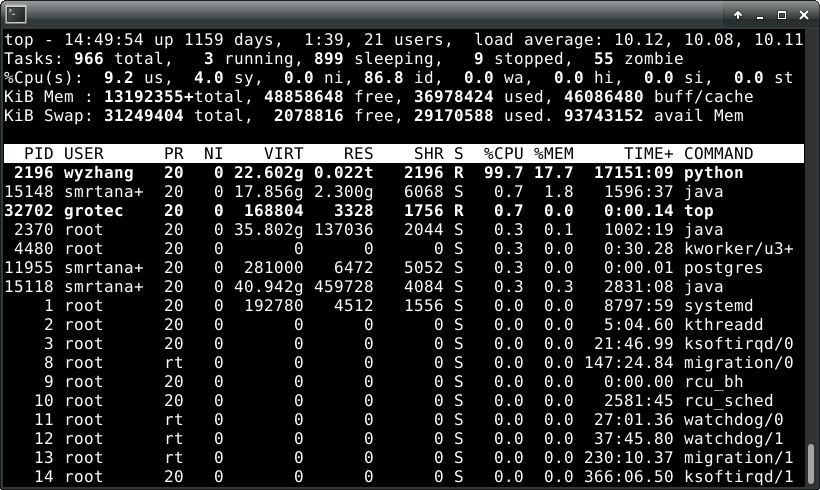

## Exercises

### `wget`
* Navigate to *~/Courses/unix_and_commandline/data*
* Run the above `wget` command to download the SARS-CoV2 annotation. List the content of your directory and confirm that the file has been downloaded. 
 

### `gunzip`, `gzip`

* Uncompress and re-compress the downloaded file. Use `ls` to confirm the operation.

#### Solution
```console
$> gunzip GCF_009858895.2_ASM985889v3_genomic.gff.gz

$> ls
GCF_009858895.2_ASM985889v3_genomic.gff

$> gzip GCF_009858895.2_ASM985889v3_genomic.gff

$> ls
GCF_009858895.2_ASM985889v3_genomic.gff.gz
```
### `ssh` and `scp`
* Login with `ssh` on the wallace server.
* Inspect your home directory on wallace.
* Create a folder hierarchy for this course (re-use the example from earlier on).
* Create an empty file somewhere in the new directory tree.
* Logout
* Copy the file created above to your local home directory.
* Edit the file using the "echo" command.
* Copy the file back to it's original location on wallace.
* Login to wallace
* Confirm that the file has changed
* Delete the entire *~/Courses* directory tree.
* Logout

### `rsync`
* Use `rsync` to copy the local directory tree *~/Courses* to wallace.
* Confirm that the directory has been created on wallace.
* Locally create a new file *~/Courses/unix_and_commandline/data/data3.csv* by concatenating *data1.csv* and *data2.csv*.
* Synchronize your local *~/Courses* with the remote counterpart on wallace.
* Delete the file *data3.csv* locally.
* Synchronize again. Has the file been removed on wallace?
* Consult the `rsync` manpage and add the appropriate command line flag to ensure the remote *data3.csv* is deleted as well.
* Login on wallace
* Create *data4.csv* by concatenating *data2.csv* and *data1.csv*.
* Logout
* Synchronize from the server to your local tree and confirm the new file is present.

### `ps`
* List all your running processes. **Hint**: Consult the manpage to find out how to list the user in `ps`'s output. Pipe the output to `grep`.